In [9]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from bispectrum.data.datasets import VanHateren, TransformDataset
from bispectrum.data.transforms import CyclicTranslation2D, Ravel, CenterMean, UnitStd
from bispectrum import bispectrum_2d
from bispectrum.plotting import image_grid

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Natural Image Patch Dataset

Here we use patches sampled from the Van Hateren database of natural images.

In [39]:
patch_size = 8
patches_per_image = 10
vh = VanHateren(patches_per_image=patches_per_image, patch_size=patch_size)

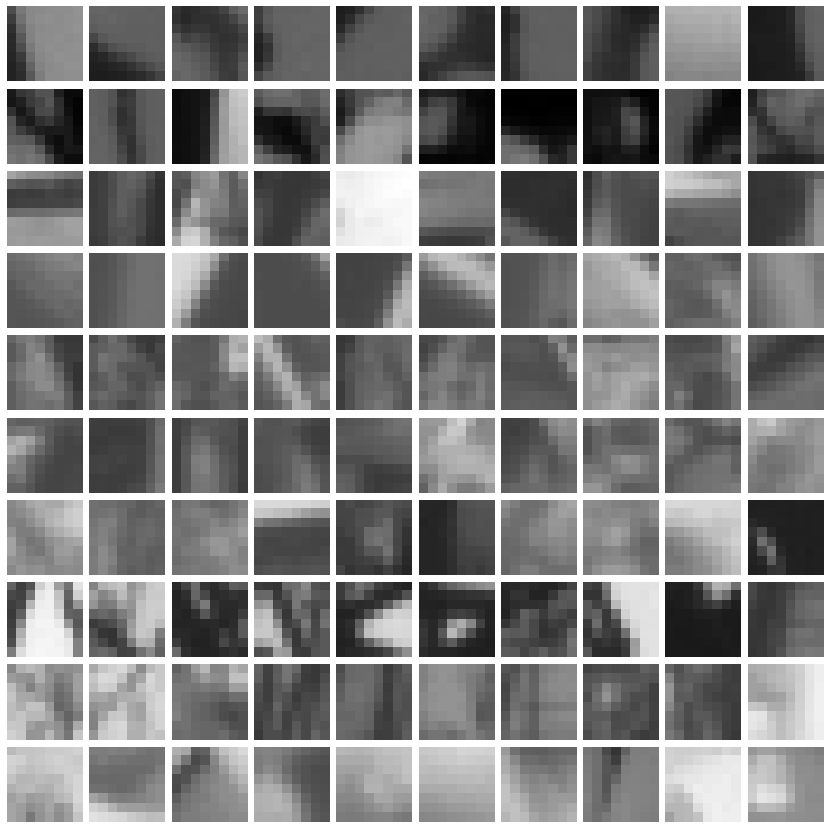

In [51]:
image_grid(vh.data[:100], shape=(10, 10), figsize=(15, 15))

## Translated Natural Image Patches

In [41]:
center = CenterMean()
std = UnitStd()
translate = CyclicTranslation2D(fraction_transforms=0.1)
# ravel = Ravel()
dataset = TransformDataset(vh, [center, std, translate])

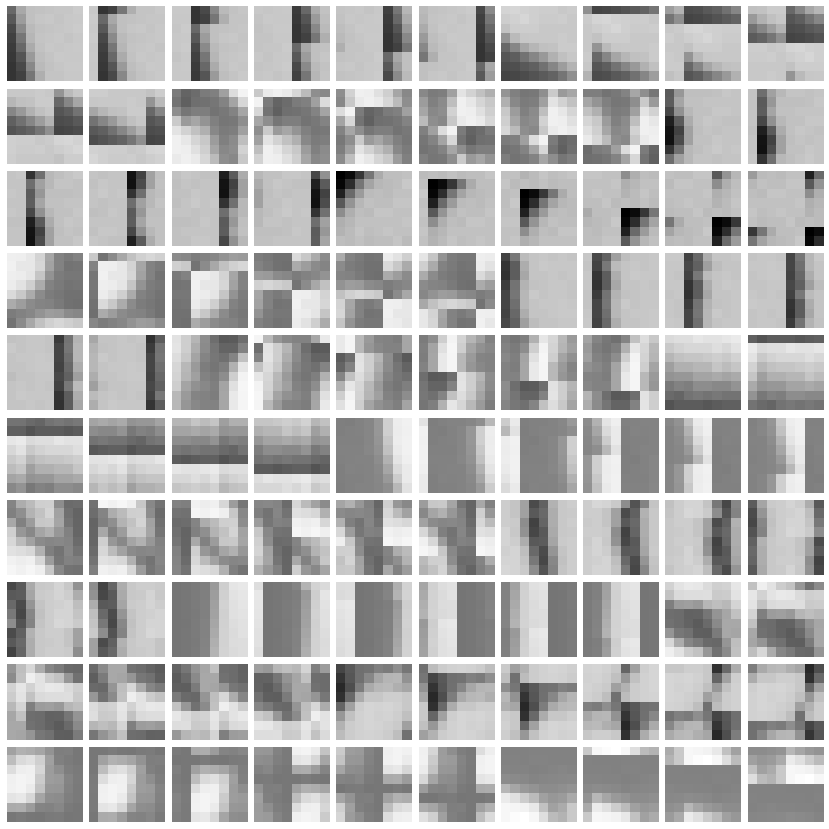

In [50]:
image_grid(dataset.data[:100], shape=(10, 10), figsize=(15, 15))

## Compute Bispectra

Computing only for the first 100 translated image patches here

In [43]:
bs = bispectrum_2d(dataset.data[:100])

In [44]:
bs.shape

torch.Size([100, 64, 64])

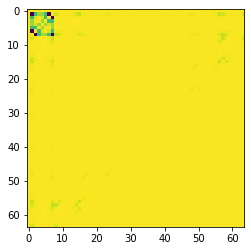

In [45]:
plt.imshow(bs[3].real)

## Visualize Bispectra

The real and imaginary components of the bispectra of the first 100 translated image patches are visualized below, demonstrating that it is constant under the orbit of cylic translation

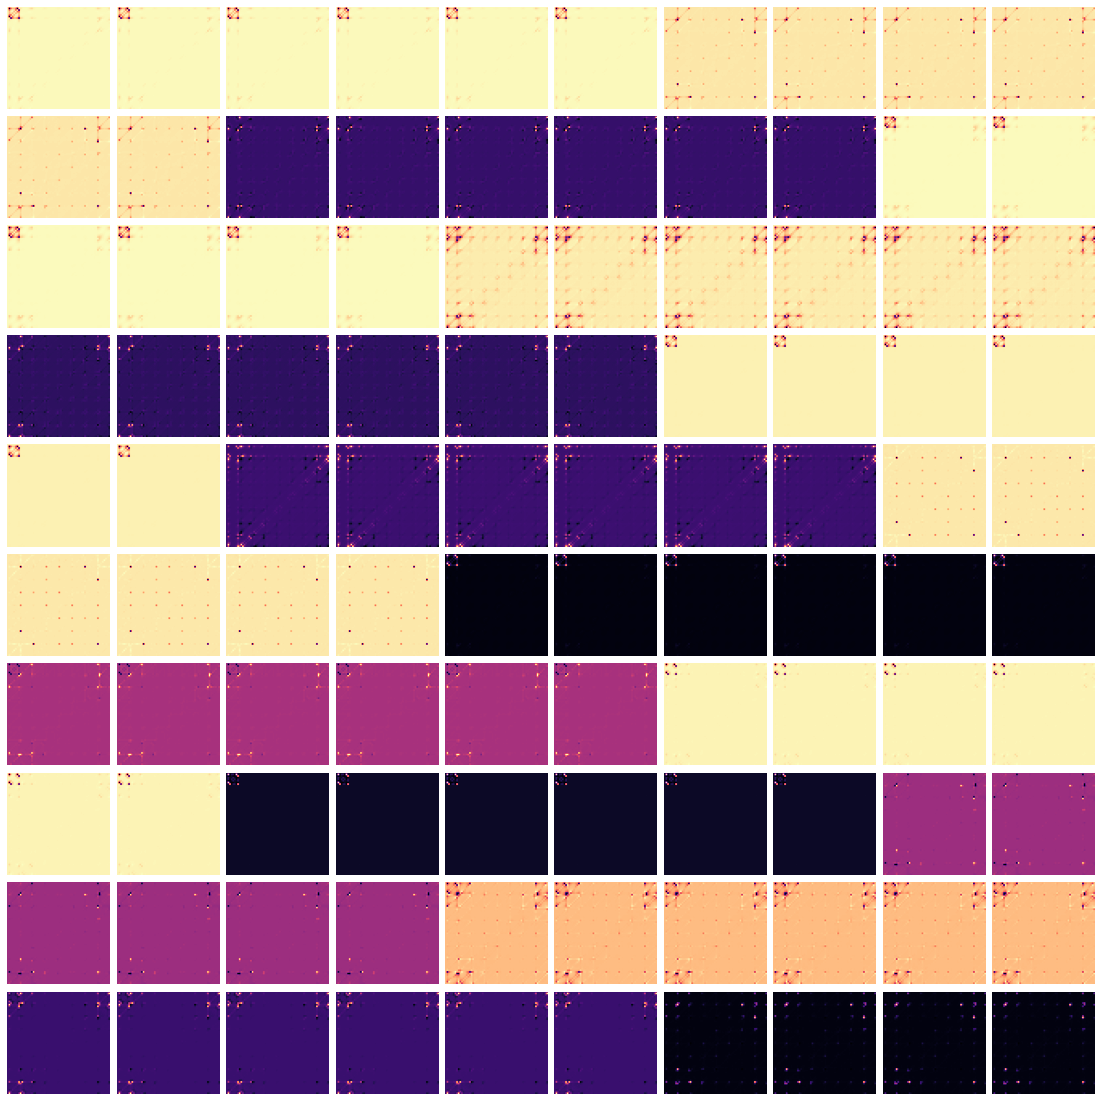

In [47]:
image_grid(bs.real, cmap="magma", figsize=(20, 20), share_range=False)

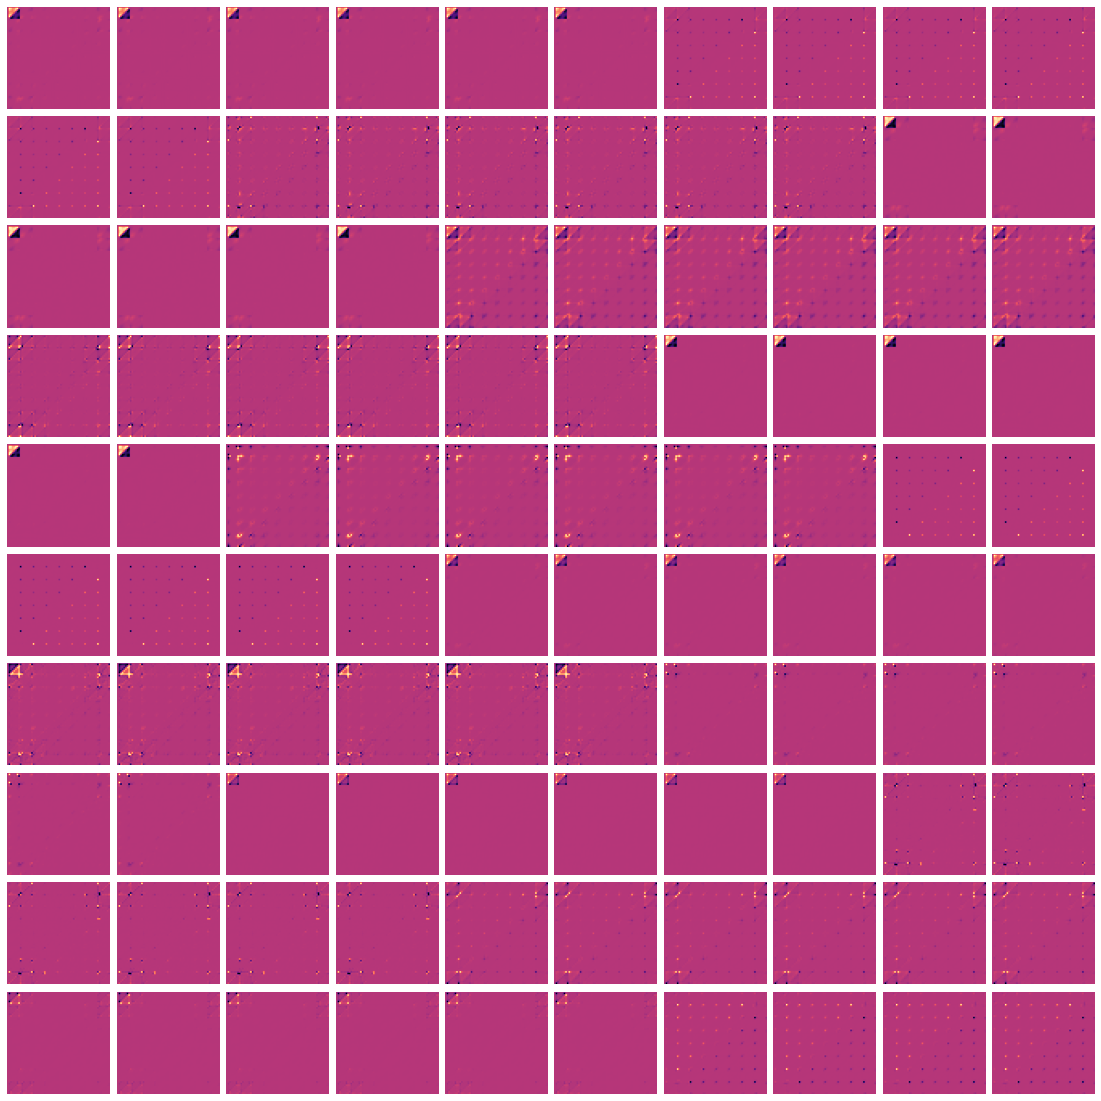

In [52]:
image_grid(bs.imag, cmap="magma", figsize=(20, 20), share_range=False)